In [2]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt

In [3]:
image = np.floor(np.random.random((30,30)) * 10)
ones = np.ones((30,30))

In [4]:
def gamma_correction(image: np.array, gamma: float):
    new_image = np.floor(255 * np.power(image/255,1/gamma))
    return new_image

In [5]:
def histogram(image: np.array, no_levels):
    N, M = image.shape
    
    hist = np.zeros(no_levels).astype(int)
    
    for level in range(no_levels):
        no_pixel_i = np.sum(image == level)
        
        hist[level] = no_pixel_i
        
    return hist
            

In [7]:
histogram(image, 8)

array([ 96,  94,  77,  73,  75,  94, 101, 108])

In [15]:
def histogram_equalization(image: np.array, no_levels):
    hist = histogram(image, no_levels)
    
    cumulative_hist = np.zeros(no_levels).astype(int)
    
    cumulative_hist[0] = hist[0]
    for level in range(1, no_levels):
        cumulative_hist[level] = hist[level] + cumulative_hist[level-1]
        
        
    transfer_function = np.zeros(no_levels)    
    N, M = image.shape
    
    for level in range(no_levels):
        s = ((no_levels-1)/float(M*N))*cumulative_hist[level]
        
        transfer_function[level] = s
        
    return transfer_function

In [19]:
def apply_equalization(image: np.array, no_levels, transfer_function: np.array):
    N, M = image.shape
    equalized_image = np.zeros((N,M))
    
    for level in range(no_levels):
        equalized_image[np.where(image==level)] = transfer_function[level]
        
    return equalized_image

In [20]:
tf = histogram_equalization(ones, 10)
result = apply_equalization(ones, 10, tf)

In [33]:
def show_image(image: np.array):
    N,_ = image.shape
    plt.imshow(image, cmap="gray", vmin=0, vmax=N)

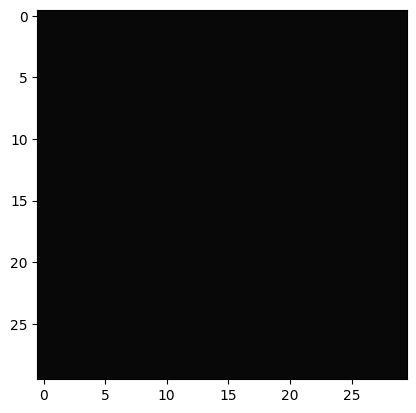

In [34]:
show_image(ones)

30


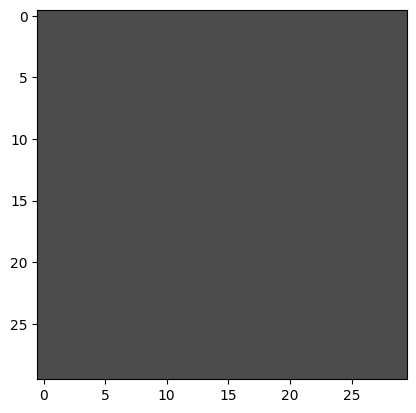

In [31]:
show_image(result)

30


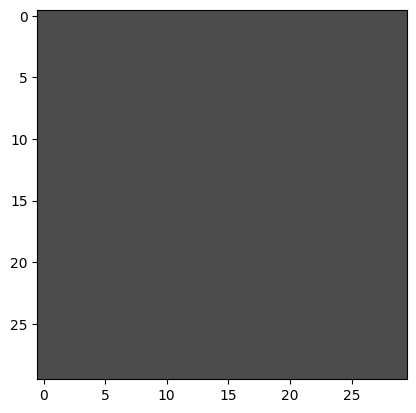

In [32]:
show_image(eq_image)

In [35]:
big_image = np.zeros((60,60))

In [47]:
h, l = big_image.shape * (2,2)

TypeError: can't multiply sequence by non-int of type 'tuple'

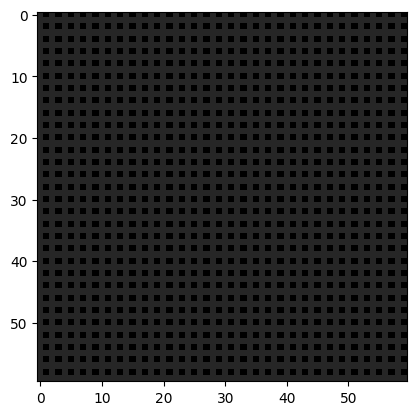

In [45]:
show_image(big_image)

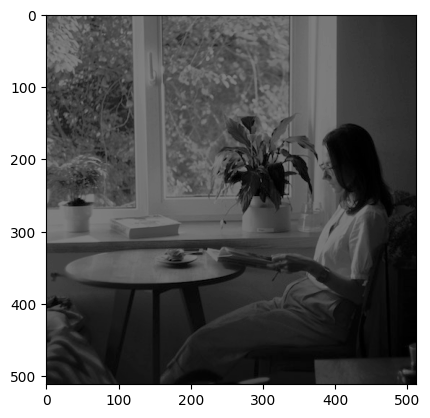

In [54]:
im = io.v3.imread('test_cases/01_high.png')
show_image(im)

In [58]:
array = np.zeros(3)

In [59]:
for i in array:
    i = i+1

In [60]:
array

array([0., 0., 0.])